# Tissue of origin relationship to cell proportions in Schildkraut HGSOC

We reasoned that the adipose-rich omentum might harbour a distinct micro-environment, which we hypothesized would contain a higher proportion of adipocytes compared to non-omental samples. Omental samples were compared with all other anatomic sites using Mann–Whitney tests for each fraction, again Bonferroni-corrected. 

We found only the stromal compartment differed significantly by tissue site. Omental samples contained a larger stromal fraction (mean = 0.157) than non-omental tumours (mean = 0.0925; Mann–Whitney p-adj = 0.0495). Epithelial content was lower in omental tissue (mean 0.614 vs 0.663) but the difference did not survive correction (p-adj = 0.718), and neither adipocyte (0.1295 vs 0.1352, p-adj = 1.00) nor immune fractions (0.099 vs 0.109, p-adj = 1.00) showed any site-specific shift. 
This finding, stromal cells being higher in omental samples, and not adipocytes, does not support our initial hypothesis. Instead, it can be explained with the fact that the Schildkraut samples are specifically cleaned to only contain the cells within the tumor, not surrounding tissue: even omental samples would then not be expected to contain more adipocytes, since only cells within the tumor are quantified. The paradox of low adipocyte content but high stromal content in omental tumors can also be explained by adipocyte plasticity: omental-adipocytes do not simply accumulate as fat cells in the tumor; instead, actively undergo changes into fibroblastic, stromal cells. This adipocyte-to-fibroblast conversion, along with activation of local adipose stem cells, enriches the tumor stroma with fibroblasts, while adipocytes per se either shrink or disappear within the tumor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

sys.path.insert(1, "../../")
sys.path.insert(1, "../")
sys.path.insert(1, "../../../")

import src.hp as hp

np.random.seed(88)

## Load survival metadata

In [2]:
base_path = os.path.dirname(os.getcwd())
meta_path = os.path.join(base_path, "input_data/metadata.xlsx")

remove_treatment = False
remove_pts_with_unknowns = True

map_stage = True
remove_unknown_stage = True

labels = ["Omental", "Ovarian", "Ov. and Fall. Tube", "Fallopian Tube"]
colors = ["peachpuff", "orange", "tomato", "salmon"]

# continuous covariates to keep “as is”
cont_cols = ["Age", "BMI"]

## Which cell types to use
immune_cells = [
    "B cells",
    "Mast cells",
    "T cells",
    "Monocytes",
    "Plasma cells",
    "NK cells",
    "DC",
    "pDC",
    "Macrophages",
    "ILC",
]

stromal_cells = ["Fibroblasts", "Endothelial cells"]

epi_cells = ["Epithelial cells"]

## Load InstaPrism cell-fraction tables (processed) and metadata

Proportions

In [3]:
props = pd.read_csv(
    os.path.join(base_path, "input_data/proportions_sch.csv"), index_col=0
)
props

,SampleID,Plasma cells,B cells,Endothelial cells,T cells,Monocytes,Fibroblasts,NK cells,Epithelial cells,DC,pDC,ILC,Macrophages,Mast cells,Erythroid,Adipocytes,Dataset,suid,ID
0,18341X10,4.919765e-49,0.052767,0.029870,1.833554e-26,1.727071e-60,7.074672e-105,8.375315e-10,0.746341,1.257780e-139,3.590420e-30,2.867046e-78,1.185148e-02,1.538137e-57,0.0,0.159171,SchildkrautB,18341X10,45369
1,18341X12,9.351753e-92,0.027159,0.011666,5.972580e-66,2.258210e-157,8.180384e-107,8.135649e-61,0.848153,3.276474e-210,2.054386e-103,1.247009e-85,2.337775e-128,1.452291e-115,0.0,0.113022,SchildkrautB,18341X12,47261
2,18341X13,6.998799e-32,0.014663,0.041547,1.004614e-23,3.232466e-34,1.225464e-02,9.550579e-19,0.819028,1.104356e-115,3.157063e-69,7.123720e-41,2.994756e-02,1.850941e-63,0.0,0.082561,SchildkrautB,18341X13,47791
3,18341X14,2.410384e-97,0.162711,0.022343,2.056824e-52,5.485488e-33,2.751866e-120,7.904174e-39,0.642545,4.774011e-154,1.326676e-75,2.334007e-77,1.516542e-02,1.488048e-80,0.0,0.157235,SchildkrautB,18341X14,47916
4,18341X15,3.439318e-76,0.050581,0.055021,5.687981e-28,5.314872e-52,8.961526e-02,2.919113e-22,0.649017,7.625379e-122,1.873123e-52,3.487465e-81,1.419715e-02,4.216693e-41,0.0,0.141568,SchildkrautB,18341X15,48002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,20160X95,1.442627e-108,0.136578,0.014420,3.410104e-30,3.267116e-82,7.666630e-23,1.501224e-35,0.710289,6.509988e-151,4.903142e-78,8.571710e-105,3.473745e-03,5.671299e-79,0.0,0.135240,SchildkrautW,20160X95,47786
584,20160X96,1.359916e-92,0.190881,0.017396,5.383974e-33,2.734703e-86,1.156925e-02,1.945285e-24,0.592805,1.063562e-147,5.374615e-82,8.551669e-96,1.270617e-02,4.370517e-04,0.0,0.174205,SchildkrautW,20160X96,47903
585,20160X97,7.862780e-79,0.102850,0.053137,8.610293e-03,1.076987e-46,4.237821e-02,1.467756e-05,0.656171,3.397744e-114,5.089409e-39,1.625064e-79,2.253584e-02,9.865474e-05,0.0,0.114204,SchildkrautW,20160X97,47926
586,20160X98,1.245316e-60,0.127050,0.034344,1.345753e-16,5.846372e-04,2.787547e-02,2.169830e-04,0.673204,4.422809e-95,4.998254e-48,3.881728e-35,5.796692e-04,4.236351e-47,0.0,0.136146,SchildkrautW,20160X98,47937


### Build the analysis table  (clinical + cell fractions)


In [4]:
renaming = hp.get_variable_renaming()
tissue_dictionary = hp.get_tissue_dictionary()

Metadata

In [5]:
meta_full = hp.open_and_clean_meta(
    meta_path=meta_path, renaming=renaming, tissue_dictionary=tissue_dictionary
)


## Removing patients that received adj. therapy
to_rm_adjtx = meta_full[meta_full["AdjTx"] == 2]["ID"].unique().tolist()
meta_full = meta_full[~meta_full["ID"].isin(to_rm_adjtx)]
props = props[~props["ID"].isin(to_rm_adjtx)]
meta_full

,ID,Age,Event,Time_Yrs,Tissue,Stage,Race,BMI,AdjTx,Residual
0,40143,63,1,8.739220,NaN,3,1,23.218229,1.0,4.0
1,41377,54,1,1.180014,NaN,3,1,17.428942,NaN,3.0
2,41387,55,1,11.983573,NaN,3,2,45.470350,1.0,2.0
3,41391,60,1,4.993840,NaN,3,1,31.340800,NaN,3.0
4,41435,59,1,4.057495,NaN,3,1,23.922658,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
583,310266,40,0,9.702186,Fallopian Tube,3,2,28.349557,NaN,NaN
584,320012,66,0,11.767760,NaN,3,2,37.677475,1.0,4.0
585,320025,60,1,6.827869,Other,3,2,38.740537,1.0,3.0
586,320043,57,1,1.553425,NaN,3,2,19.854802,1.0,4.0


In [6]:
# match index in both
meta_full.index = meta_full.ID
props.index = props.ID
props.drop(columns=["ID", "SampleID", "suid"], inplace=True)

## and merge:
df = meta_full.join(props, how="inner")

cell_types = [
    col for col in df.columns if col not in meta_full.columns and col not in cont_cols
]
cell_types.remove("Dataset")
print(df.Tissue.value_counts(dropna=False))

Tissue
NaN                         440
Ovary                        58
Fallopian Tube and Ovary     42
Fallopian Tube               15
Omentum                      15
Other                        11
Name: count, dtype: int64


/var/folders/d3/x10lxf7x1n37__s3n36qxmlw0000gp/T/ipykernel_33310/156692257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  props.drop(columns=["ID", "SampleID", "suid"], inplace=True)


Plasma cells


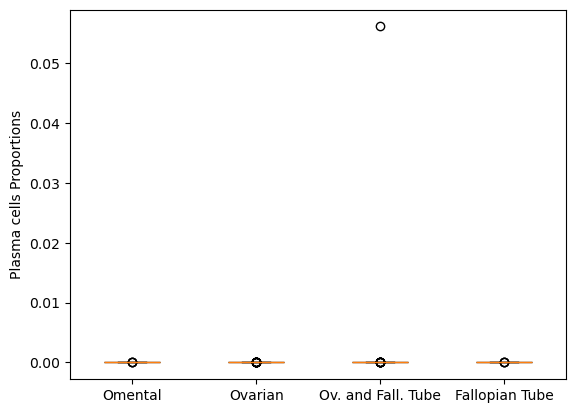

B cells


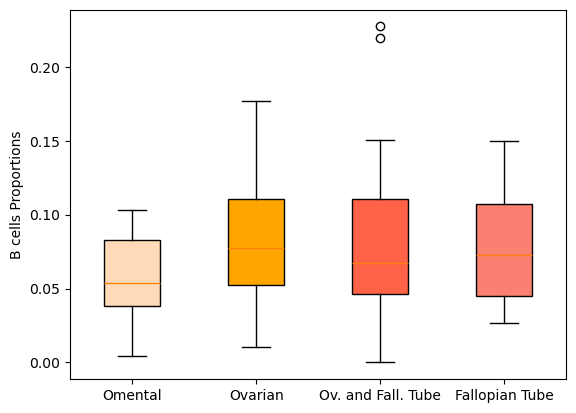

Endothelial cells


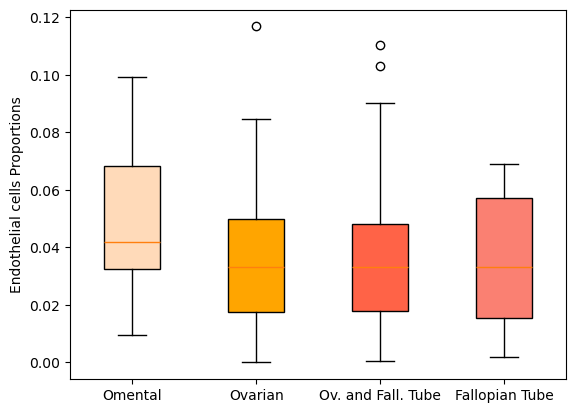

T cells


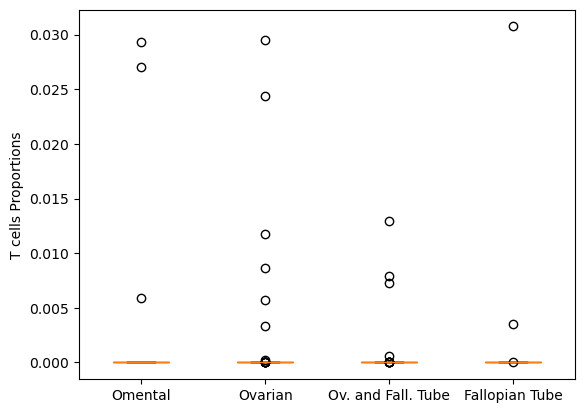

Monocytes


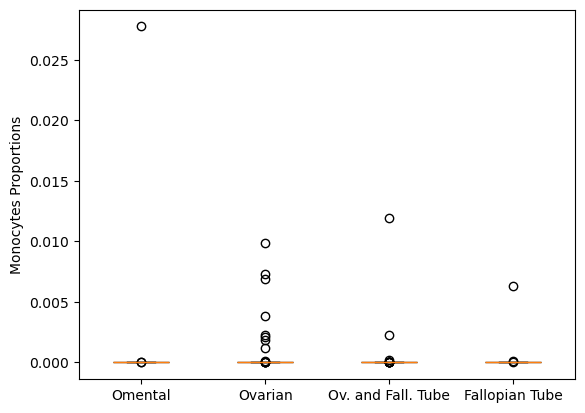

Fibroblasts


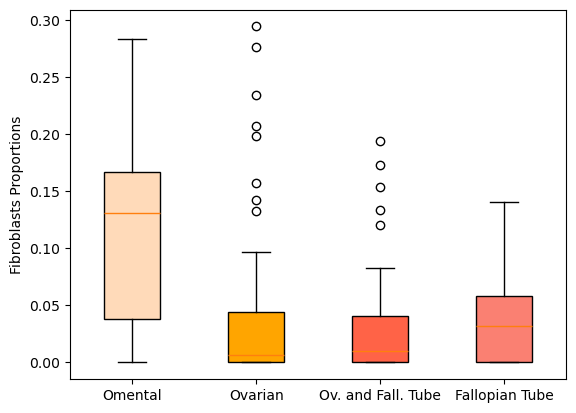

NK cells


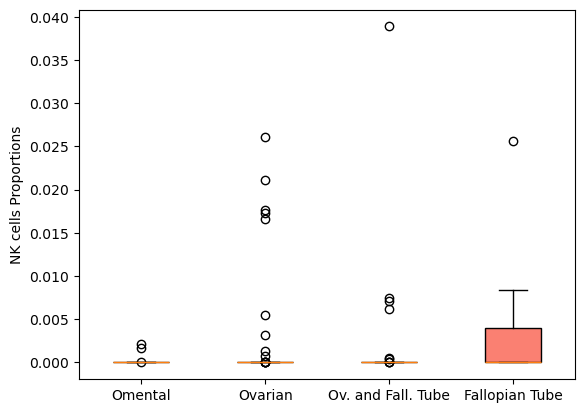

Epithelial cells


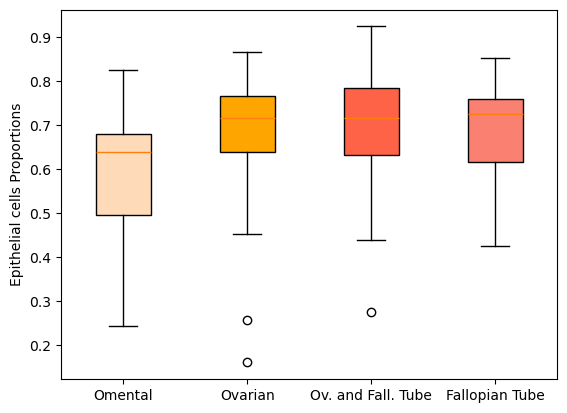

DC


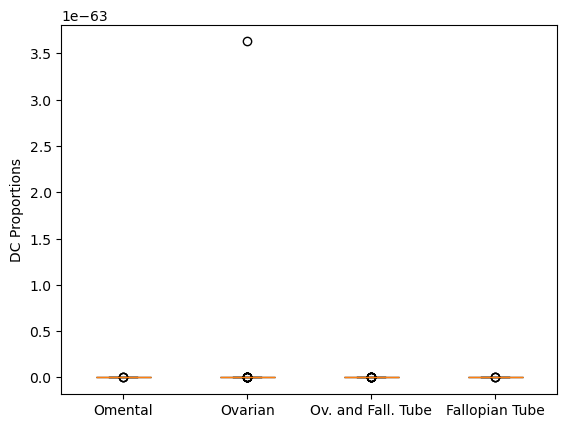

pDC


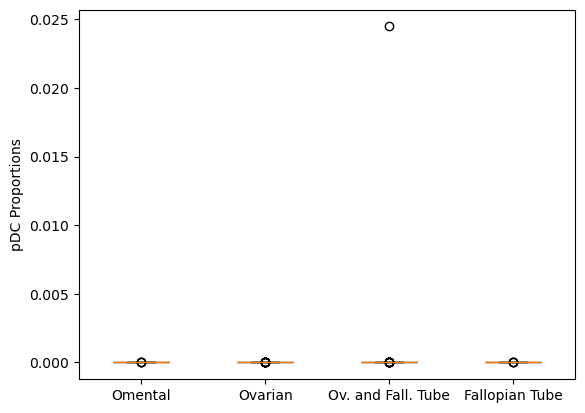

ILC


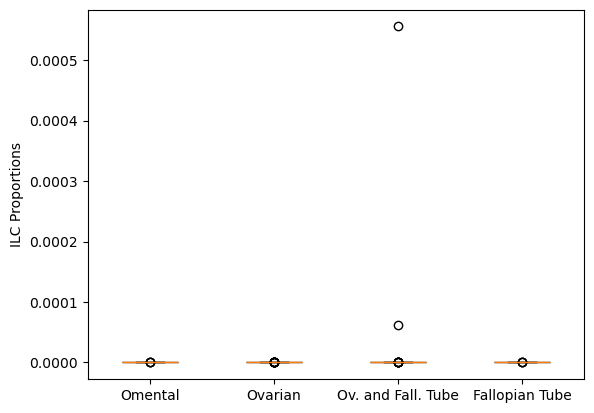

Macrophages


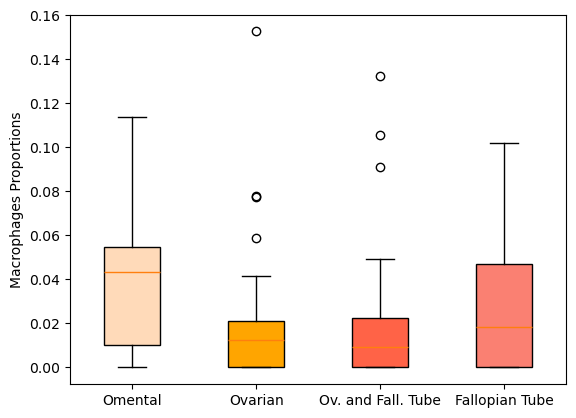

Mast cells


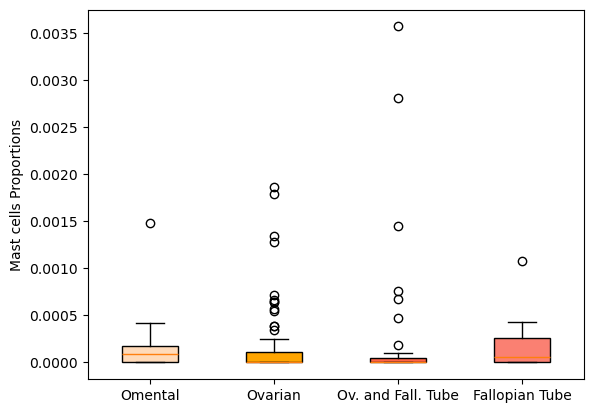

Erythroid


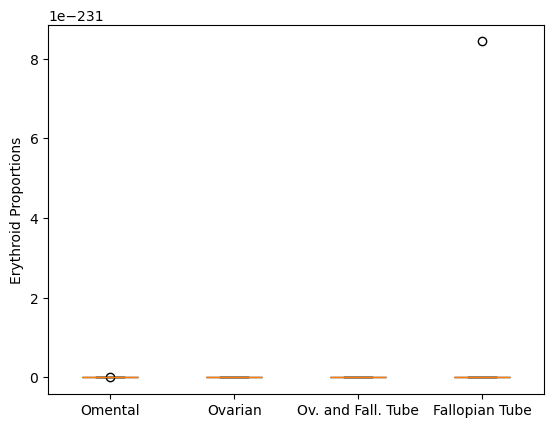

Adipocytes


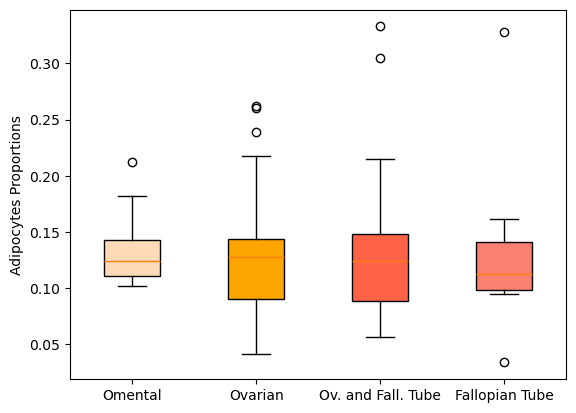

In [7]:
for cell in cell_types:
    print(cell)

    om = df[df.Tissue == "Omentum"][cell]
    ov = df[df.Tissue == "Ovary"][cell]
    ovft = df[df.Tissue == "Fallopian Tube and Ovary"][cell]
    ft = df[df.Tissue == "Fallopian Tube"][cell]

    values = [om, ov, ovft, ft]

    fig, ax = plt.subplots()
    ax.set_ylabel(f"{cell} Proportions")

    bplot = ax.boxplot(
        values, patch_artist=True, tick_labels=labels  # fill with color
    )  # will be used to label x-ticks

    # fill with colors
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)

    plt.show()

Now by group:

In [8]:
df["Immune"] = df[immune_cells].sum(axis=1)
df["Stromal"] = df[stromal_cells].sum(axis=1)
df["Epithelial"] = df[epi_cells].sum(axis=1)

In [9]:
df["Tissue"] = df["Tissue"].apply(
    lambda x: "Omental" if str(x) == "Omentum" else "Non-Omental"
)
df.Tissue.value_counts(dropna=False)

Tissue
Non-Omental    566
Omental         15
Name: count, dtype: int64

In [10]:
### Omentum vs Non-Omentum × Adipocyte / Immune / Stromal – t-test + Bonferroni

df_om = df.copy()
df_om["IsOmentum"] = (df_om["Tissue"] == "Omental").astype(int)
fractions = ["Adipocytes", "Immune", "Stromal", "Epithelial"]

rows = []
for frac in fractions:
    om = df_om.loc[df_om.IsOmentum == 1, frac]
    non = df_om.loc[df_om.IsOmentum == 0, frac]

    u_stat, p_raw = mannwhitneyu(om, non, alternative="two-sided")
    rows.append(
        {
            "Fraction": frac,
            "MeanOment": om.mean(),
            "MeanNonOm": non.mean(),
            "p_raw": p_raw,
        }
    )

res = pd.DataFrame(rows)
res["p_bonf"] = multipletests(res.p_raw, method="bonferroni")[1]
res = res.sort_values("p_bonf")

print("\n=== Omentum vs Non-Omentum (Mann–Whitney, Bonferroni) ===")
display(res.round(4))


=== Omentum vs Non-Omentum (Mann–Whitney, Bonferroni) ===


,Fraction,MeanOment,MeanNonOm,p_raw,p_bonf
2,Stromal,0.1664,0.0925,0.0046,0.0184
3,Epithelial,0.5964,0.6633,0.0681,0.2726
0,Adipocytes,0.1328,0.1352,0.9249,1.0000
1,Immune,0.1044,0.1089,0.8376,1.0000


In [11]:
# build tidy frame with tissue names
long_all = (
    df_om[["Tissue"] + fractions]  # Tissue = "Omental"/"Other"
    .replace({"Other": "Non-Omental"})  # rename for legend clarity
    .melt(id_vars="Tissue", var_name="Fraction", value_name="Prop")
)
long_all

,Tissue,Fraction,Prop
0,Non-Omental,Adipocytes,0.113422
1,Non-Omental,Adipocytes,0.169611
2,Non-Omental,Adipocytes,0.064832
3,Non-Omental,Adipocytes,0.119373
4,Non-Omental,Adipocytes,0.110333
...,...,...,...
2319,Non-Omental,Epithelial,0.777904
2320,Non-Omental,Epithelial,0.771372
2321,Non-Omental,Epithelial,0.660166
2322,Non-Omental,Epithelial,0.570443


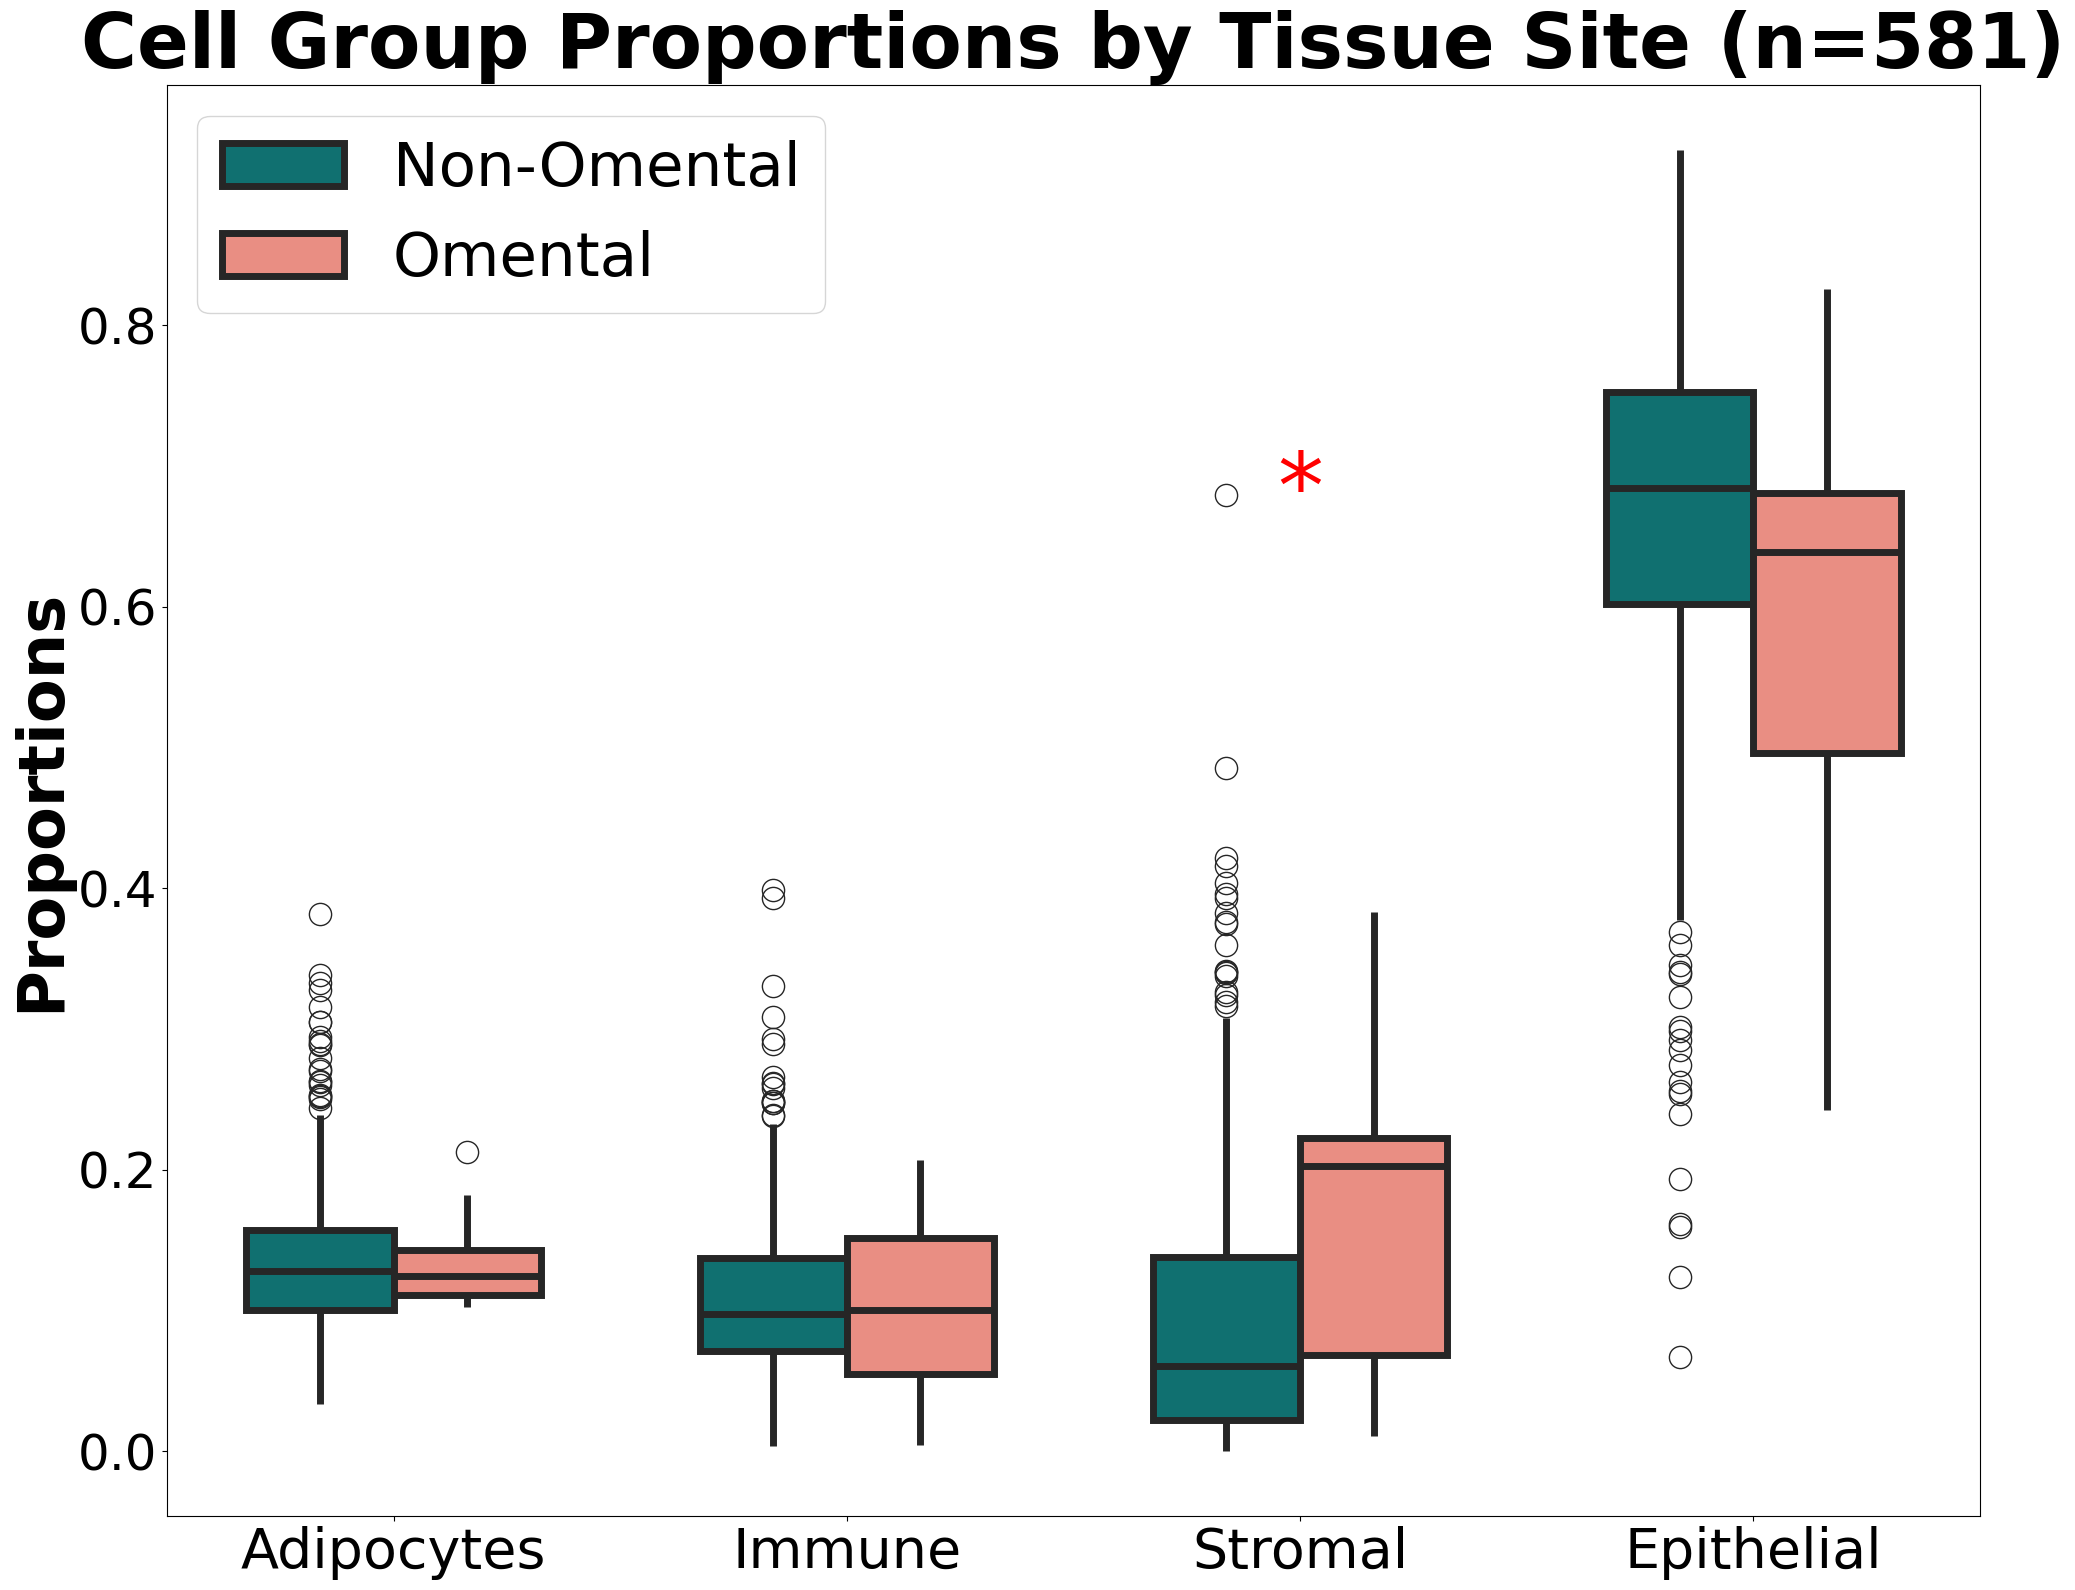

In [14]:
palette = {"Omental": "salmon", "Non-Omental": "teal"}

plt.figure(figsize=(20, 16))
ax = sns.boxplot(
    data=long_all,
    x="Fraction",
    y="Prop",
    hue="Tissue",
    palette=palette,
    width=0.65,
    showcaps=False,
    fliersize=16,
    linewidth=5,
)

# ── add significance stars (p_bonf from res DF) ─────────────────────────
for i, frac in enumerate(fractions):
    p_adj = res.loc[res.Fraction == frac, "p_bonf"].values[0]
    star = hp.p_to_star(p_adj)
    if star:
        y_max = long_all.loc[long_all.Fraction == frac, "Prop"].max() - 0.05
        ax.text(
            i, y_max + 0.02, star, ha="center", va="bottom", color="red", fontsize=66
        )

plt.ylabel("Proportions", fontsize=46, fontweight="bold")
plt.xlabel("", fontsize=46, fontweight="bold")
plt.title(f"Cell Group Proportions by Tissue Site (n={df.shape[0]})", fontsize=55, fontweight="bold")
plt.legend(title="", fontsize=44, loc="best")
plt.xticks(fontsize=40)
plt.yticks(fontsize=36)
plt.tight_layout()
plt.show()